In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Gzip the star filtered and raw outputs
! ls ./DataT1/Solo.out/Gene/filtered/

barcodes.tsv.gz  features.tsv.gz  matrix.mtx.gz


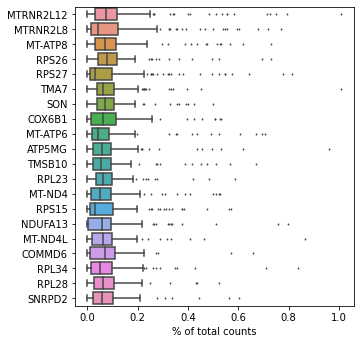

In [3]:
tcells = sc.read_10x_mtx("./DataT1/Solo.out/Gene/filtered/")
bcells = sc.read_10x_mtx("./DataB1/Solo.out/Gene/filtered/")
adata = tcells.concatenate(bcells)

sc.pl.highest_expr_genes(adata, n_top=20)

... storing 'feature_types' as categorical


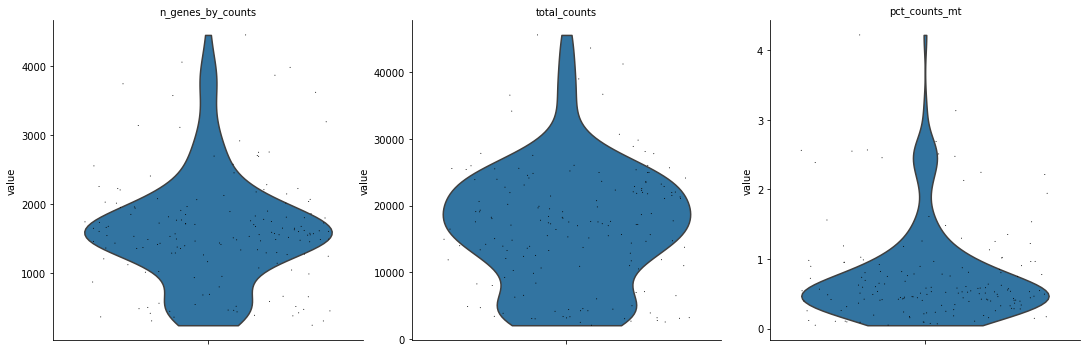

In [4]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=2)

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

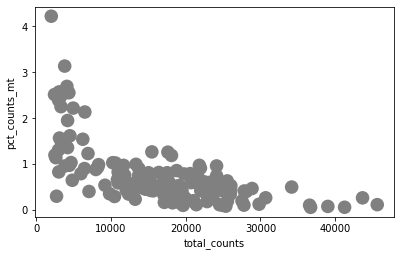

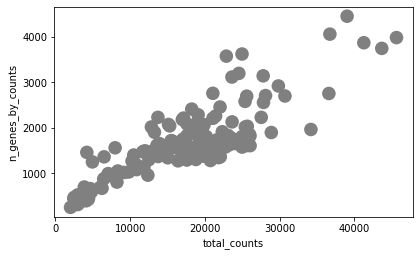

In [5]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [6]:
#filter and normalize
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

/home/cmr736/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


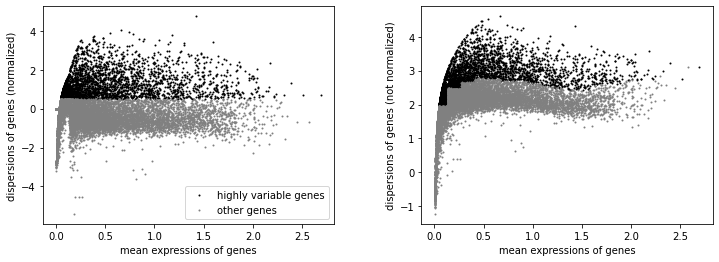

In [7]:
#select highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

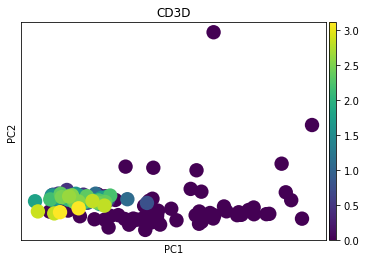

In [8]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CD3D')

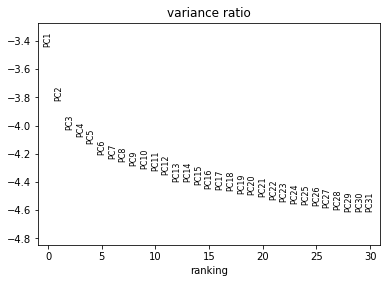

In [9]:
sc.pl.pca_variance_ratio(adata, log=True)

In [10]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

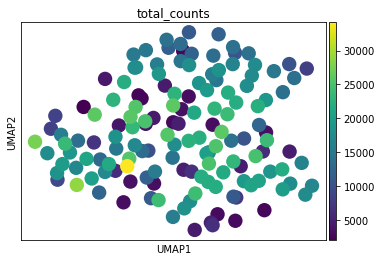

In [11]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=[ 'total_counts'])

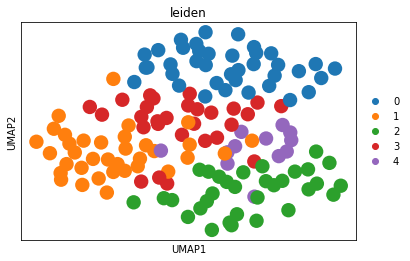

In [12]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])

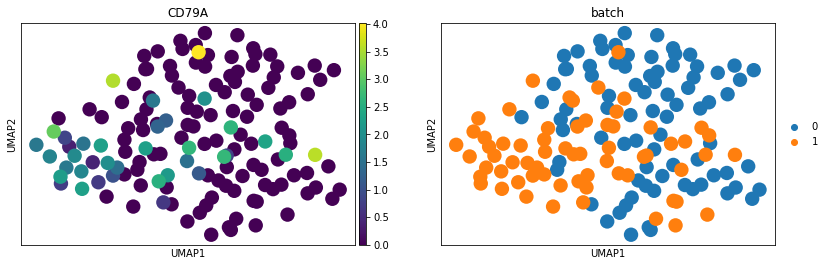

In [13]:
sc.pl.umap(adata, color=[ 'CD79A', 'batch'])

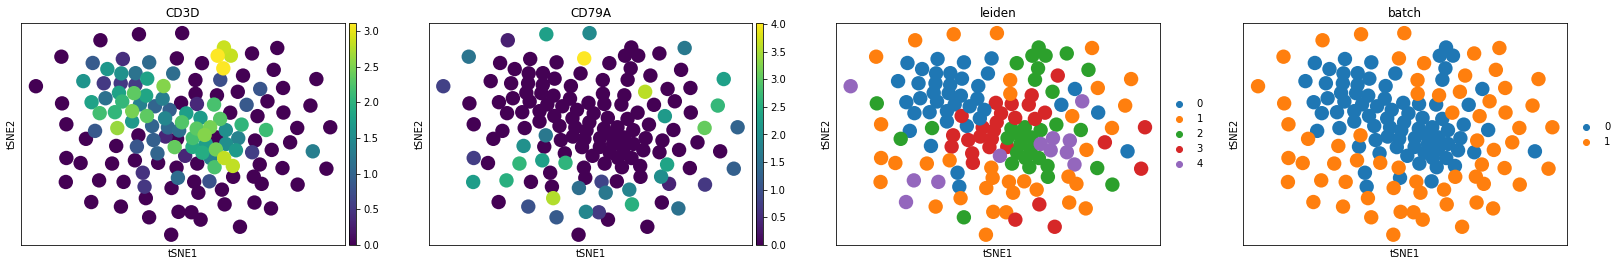

In [14]:
sc.tl.tsne(adata)
sc.pl.tsne(adata, color = ['CD3D','CD79A', 'leiden', 'batch'])

In [15]:
adata.obs

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AACATTCT-0,0,1524,1518,17280.0,100.0,0.578704,0
AACGAGGT-0,0,1793,1779,23450.0,124.0,0.528785,3
AAGCACAT-0,0,1474,1467,11704.0,113.0,0.965482,0
AAGTGGCT-0,0,1724,1706,15636.0,84.0,0.537222,0
ACACCGTG-0,0,1611,1602,26044.0,136.0,0.522193,3
...,...,...,...,...,...,...,...
TGCGTAGG-1,1,306,305,3016.0,72.0,2.387268,2
TGCTCTCA-1,1,2010,1965,19653.0,18.0,0.091589,1
TTAGACGC-1,1,525,518,3000.0,39.0,1.300000,1
TTCGCTGT-1,1,1498,1476,13977.0,68.0,0.486514,1


In [16]:
sc.tl.rank_genes_groups(adata, groupby='batch')

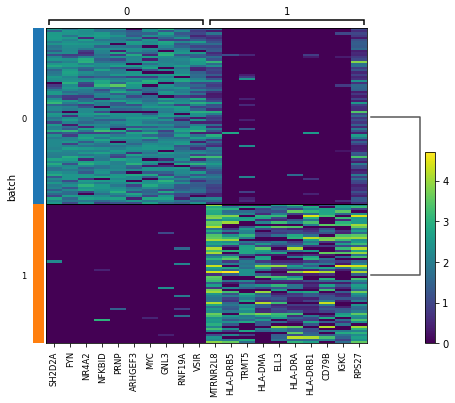

In [17]:
sc.pl.rank_genes_groups_heatmap(adata)